In [3]:
#import all the necessary libraries
from tensorflow import keras
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

In [8]:
model_path = 'inference/model.h5' #the model we converted
model = models.load_model(model_path, backbone_name='resnet50')#Loads the model to run inference
species = {
    0:'Agouti',
    1:'Roe_Deer',
    2:'Wild_Boar',
    3:'Ocelot',
    4:'Red_Squirrel',
    5:'Bird_spec',
    6:'White_Tailed_Deer',
    7:'Mouflon',
    8:'Red_Deer',
    9:'European_Hare'
}

In [43]:
# load image
#images/Set2/1.56-Mouflon/SEQ75186/SEQ75186_IMG_0001.JPG
#images/Set2/1.59-Wild_Boar/SEQ76323/SEQ76323_IMG_0001.JPG
#images/Set2/1.63-European_Hare/SEQ76872/SEQ76872_IMG_0002.JPG
#images/Set1/1.57-Red_Deer/SEQ75459/SEQ75459_IMG_0001.JPG
#images/Set1/1.58-Roe_Deer/SEQ80480/SEQ80480_IMG_0003.JPG
def imageDetection(filepath):
    image = read_image_bgr(filepath) #Used OpenCV function which is changes image to bgr color encoding

    draw = image.copy() #Saves a copy of image locally to draw and color the boxes
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB) #Changes color encoding to rgb

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.6: #0.6 kind of a Intersection over Union which is a metric for object detection
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(species[label], score)
        draw_caption(draw, b, caption)

    #Matplotlib used to display the image and object detected within it
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()

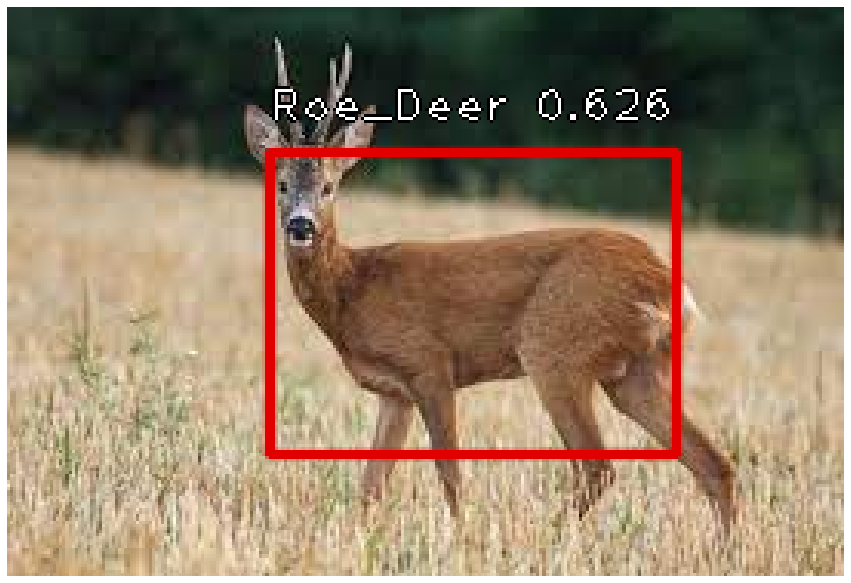

In [44]:
imageDetection('images/Set4/roe.jpg')